# 1083 Albumin Analysis with Updated Dataset

### By: Ian Weimer

## ML Caveats

### If the feature space is not correlated enough with the target variable, then generally  no model can have any meaningful predictive power.

### Individual variables do not necessarily need to have high correlations with the target variable (although this is generally a good thing), but altogether, the variables need to be correlated/predictive enough of the target variable. 

## Imports

In [126]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from scipy import stats
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import make_column_transformer
import scipy.stats
pd.set_option('display.max_columns', None)
import phik
from phik import resources, report

## Preprocessing and Exploratory Data Analysis 

## Load Albumin Data

In [127]:
pwd

'C:\\Users\\Iweimer\\Desktop\\BB_Git\\1083-albumin-data-exploration\\ML\\K70_Cohort'

In [128]:
df_alb = pd.read_csv('K70_cohort.csv', index_col=0)

In [129]:
df_alb.head()

personid                           encounterid  \
0  005c5ecc-af08-439c-9649-ddfa92c01419  48796da9-9f8e-4eb2-8052-4cf684f2777d   
1  07116bfe-694e-4d32-b989-18d01be1c63a  a3c69685-4dab-4db4-9f59-bc9e1e7b4714   
2  0966a95d-6f14-4791-98eb-192a57c6cf9d  2ff8ac65-0f37-42c0-a397-0b5c830900ee   
3  0b195e78-8b4c-4885-a6f1-162738405bf4  07ea020e-dbef-418c-b4b2-be3d104ba6be   
4  0c08fc94-32eb-4e48-bd22-f075f911f7cb  03255b92-d10f-41fd-8387-9e223f9be912   

            index_date  zip_code bed_size  ICU   LOS_days  90_day_mortality  \
0  2021-01-15 18:44:00         0   >=1000    1  30.388194                 0   
1  2021-09-18 14:29:00         7  500-999    0   8.240278                 0   
2  2016-11-30 04:54:00         9  300-499    1   5.698611                 0   
3  2016-02-27 00:53:00         1   >=1000    0  13.857639                 0   
4  2019-08-23 21:07:00         1   >=1000    0   5.127778                 0   

   90_day_readmission  days_until_readmission  hospital_free_days  Cirrhosis  \
0                 0.0              324.164259                  28          1   
1                 1.0               32.963889                  81          1   
2                 0.0                     NaN                  85          1   
3                 0.0                     NaN                  77          1   
4                 0.0              277.255556                  27          1   

   CCI  qSOFA    MELD  albumin_timing  SEWS  tenant  
0    2      1     NaN               2     4      73  
1    4      1  11.000               0     0      36  
2    4      0  18.518               0     0      18  
3    2      1  22.000               2     2      46  
4    3      0  16.574               1     0      45

In [130]:
df_alb.shape

(20844, 18)

In [131]:
print('Number of unique patients:', df_alb.personid.nunique())
print('Number of unique encounters:', df_alb.encounterid.nunique())

Number of unique patients: 20844
Number of unique encounters: 20844


In [132]:
df_alb.isnull().sum()

personid                      0
encounterid                   0
index_date                    0
zip_code                      0
bed_size                      0
ICU                           0
LOS_days                      0
90_day_mortality              0
90_day_readmission         5086
days_until_readmission    11656
hospital_free_days            0
Cirrhosis                     0
CCI                           0
qSOFA                         0
MELD                       7452
albumin_timing                0
SEWS                          0
tenant                        0
dtype: int64

## Load Non Albumin Data

In [133]:
df_no_alb = pd.read_csv('K70_control_cohort.csv', index_col=0)

In [134]:
df_no_alb.head()

personid                           encounterid  \
0  0028a16c-3095-4bcd-aa4c-25913a5212f7  a5d28d15-e02a-4221-8fc3-4b3d1b3aa7fb   
1  00628e4e-04bb-4a8e-a71e-a052e6ceb93c  c0962fcb-bddd-4245-afe2-f768a0c398f5   
2  031fb371-82de-439c-af7f-6453ae581a7b  e2b5ecff-3d23-4bef-9ac3-4487fe2c932e   
3  03b6658c-74b9-4955-afa4-a110fef53e31  7727d081-52ae-40b6-a0d6-fe1111fcdcbe   
4  03d4643b-2d0e-4019-9d4c-e964d52893d8  5148fe42-a45b-4570-9b4c-346ad4eaa881   

            index_date  zip_code bed_size  ICU  LOS_days  90_day_mortality  \
0  2022-02-25 22:18:41         9   >=1000    1  1.941887                 1   
1  2019-05-12 09:08:00         8   >=1000    0  2.062500                 1   
2  2018-06-27 18:19:00         8   >=1000    0  7.161111                 0   
3  2021-03-14 00:42:00         6  500-999    0  2.894444                 0   
4  2017-05-03 03:27:00         2  500-999    0  2.519444                 0   

   90_day_readmission  days_until_readmission  hospital_free_days  Cirrhosis  \
0                 NaN                     NaN                   0          1   
1                 NaN                     NaN                   0          1   
2                 1.0                8.899306                   2          1   
3                 1.0               75.006944                   7          0   
4                 0.0              705.913194                  88          0   

   CCI  qSOFA    MELD  SEWS  tenant  
0    4      0  39.099     0      68  
1    3      2  31.000     2      63  
2    5      1  12.000     1      63  
3    3      1   7.000     0      77  
4    1      0   6.000     2     111

In [135]:
df_no_alb.shape

(114605, 17)

In [136]:
print('Number of unique patients:', df_no_alb.personid.nunique())
print('Number of unique encounters:', df_no_alb.encounterid.nunique())

Number of unique patients: 114605
Number of unique encounters: 114605


In [137]:
df_no_alb.isnull().sum()

personid                      0
encounterid                   0
index_date                    0
zip_code                      0
bed_size                    119
ICU                           0
LOS_days                      0
90_day_mortality              0
90_day_readmission         4664
days_until_readmission    45607
hospital_free_days            0
Cirrhosis                     0
CCI                           0
qSOFA                         0
MELD                      60492
SEWS                          0
tenant                        0
dtype: int64

## Examine Difference In Vars

In [138]:
lst1 = df_alb.columns.tolist()
lst1

['personid',
 'encounterid',
 'index_date',
 'zip_code',
 'bed_size',
 'ICU',
 'LOS_days',
 '90_day_mortality',
 '90_day_readmission',
 'days_until_readmission',
 'hospital_free_days',
 'Cirrhosis',
 'CCI',
 'qSOFA',
 'MELD',
 'albumin_timing',
 'SEWS',
 'tenant']

In [139]:
lst2 = df_no_alb.columns.tolist()
lst2

['personid',
 'encounterid',
 'index_date',
 'zip_code',
 'bed_size',
 'ICU',
 'LOS_days',
 '90_day_mortality',
 '90_day_readmission',
 'days_until_readmission',
 'hospital_free_days',
 'Cirrhosis',
 'CCI',
 'qSOFA',
 'MELD',
 'SEWS',
 'tenant']

In [140]:
lst3 = [x for x in lst1 if x not in lst2]

In [141]:
lst3

['albumin_timing']

## Remove variables not relevant to analysis 

In [142]:
# Removing these variables: 
# Unnamed: 0 (index), index_date
# Keeping personid, encounterid for now
# But will drop these later as well

df_alb.drop(columns = ['index_date'], inplace=True)

df_no_alb.drop(columns = ['index_date'], inplace=True)

## Create binary "Albumin" variable for both datasets

In [143]:
# albumin dataset = all 1s 
df_alb = df_alb.assign(albumin = 1)

In [144]:
# no albumin dataset = all 0s
df_no_alb = df_no_alb.assign(albumin = 0)

In [145]:
# df_alb.shape

In [146]:
# df_no_alb.shape

In [147]:
# df_alb.head()

In [148]:
# df_no_alb.head()

## Combine Datasets

In [149]:
df = pd.concat([df_alb, df_no_alb], axis=0)

In [150]:
df.shape

(135449, 18)

In [151]:
df.head(50)

personid  \
0   005c5ecc-af08-439c-9649-ddfa92c01419   
1   07116bfe-694e-4d32-b989-18d01be1c63a   
2   0966a95d-6f14-4791-98eb-192a57c6cf9d   
3   0b195e78-8b4c-4885-a6f1-162738405bf4   
4   0c08fc94-32eb-4e48-bd22-f075f911f7cb   
5   0d35b91a-883d-43cb-ad15-31123a3008c8   
6   1240636c-0665-457e-a973-11e6f31e73a7   
7   14a7cf74-4469-4102-aac3-cdf906baa891   
8   16e21cc6-4d8c-44b1-b5e6-206c5f466893   
9   17366a16-6826-417e-aaec-cdbb22ce6f85   
10  198035a7-a39a-4c51-8f9c-22b7968cc1e4   
11  19993717-aa8e-4f29-b59c-7471d8f2e80f   
12  1fa14120-434b-4db8-a05a-d05686918255   
13  22c621aa-9586-4833-b301-7baa337b801e   
14  24ccefd2-5f30-4bb2-91ee-30e9ae0e17ac   
15  26933aaf-41e2-4669-a36d-bc4dc8435aab   
16  274bdb85-f0de-4a44-9934-a5bc229b36a6   
17  28d8c207-5688-48d3-ae5a-0d0b229b2f5e   
18  29ff06b4-7528-4af5-a726-94481e2205b2   
19  2b9f09a6-05c7-4624-b445-115d9e5dc82b   
20  2cfbf2b2-15de-4343-8518-67852919a555   
21  2d3f6a7a-67e5-433e-be9f-dfffa2f20e5a   
22  2d575e51-84af-4dca-a83d-e87548548158   
23  37025f9f-029b-43f5-9709-f24901f447cd   
24  37a5ff4e-69e3-429a-8b22-f0cfac011c87   
25  37b7f928-1eaf-4c76-982c-c517caeda05a   
26  3a0a96e8-ffac-43b1-aa5a-0f9cd2f947d7   
27  3a0b39be-3ba5-4990-a373-61aeebab868e   
28  3a609ef4-33b9-4212-aee7-c4f616bf5e3b   
29  3beb6fd0-d944-4ad4-9ccf-d372e62635e1   
30  3f73b7d7-3ec0-4c65-94f0-7b3bcb423266   
31  409c6fe3-5849-404e-b968-5e7d1d8e9d4e   
32  42d6a9d8-29da-4b4d-bc1c-422707be190c   
33  43eb4e11-ae4e-4c8f-a7ec-a026ebeba2c3   
34  475d11b8-558c-4e3f-b1a0-818d0ae16e1a   
35  4b39c792-416b-448a-9229-b83cd5ca304d   
36  4e118c67-5e40-4f7b-9e47-9f53546962a6   
37  5096d58b-853c-4d3f-b15d-a6ffe1bf7f9f   
38  51c3e17f-ecb1-403c-aa63-60f99cfa99d8   
39  52d67823-d49e-4121-8ab4-f320053bca31   
40  530a4ebd-d3ea-44f2-99ef-463c821aa707   
41  54f2e078-2ee6-4b02-8d29-c3b43e9a398d   
42  56ca0997-f86f-409b-ad83-38dc93c6a2c0   
43  57c9844e-85c5-4f52-9bd1-a3e9fe617e7a   
44  5927e138-c5c4-4dbc-81b2-86739cd8d2ce   
45  5973208e-1d90-44f6-b394-c11d56127484   
46  59b84b4b-5976-42ee-bae8-80ed628df991   
47  5aa222e2-81b6-4905-ba4e-68a05a939379   
48  5b1509d5-a94b-4a4b-b2c0-eef1ec1a690a   
49  5b8a40ff-94c0-4dea-bd39-5e35b5c70de3   

                             encounterid  zip_code bed_size  ICU    LOS_days  \
0   48796da9-9f8e-4eb2-8052-4cf684f2777d         0   >=1000    1   30.388194   
1   a3c69685-4dab-4db4-9f59-bc9e1e7b4714         7  500-999    0    8.240278   
2   2ff8ac65-0f37-42c0-a397-0b5c830900ee         9  300-499    1    5.698611   
3   07ea020e-dbef-418c-b4b2-be3d104ba6be         1   >=1000    0   13.857639   
4   03255b92-d10f-41fd-8387-9e223f9be912         1   >=1000    0    5.127778   
5   1dc64909-cbe3-46e2-94ae-7c6de6a38364         7  500-999    0   12.054167   
6   b24e6245-5f64-4f81-8292-30eafc3c1716         9   >=1000    0   14.795139   
7   47905ac2-9758-4da5-adc5-1349c4c232a9         9   >=1000    0    0.278912   
8   f0f847d0-a8c0-4d11-b500-110f6f495f1b         1   >=1000    0    0.307639   
9   68610783-67e4-414a-a969-18f82d7ae58a         1   >=1000    0    2.900000   
10  4e03c966-fb83-42e0-b940-bc40a1fcd351         8   >=1000    0   20.163889   
11  e4019d50-71c0-4c99-8186-834823fe5c23         8   >=1000    0    7.438889   
12  8da03794-c5a4-4f88-9a0b-08512bdd6059         6  500-999    0    3.861898   
13  92b9577e-6cd9-47cd-9893-5b488cb1f949         8  300-499    1   39.375694   
14  84600109-1891-4031-a589-f39cf7c508cf         9   >=1000    0    2.554167   
15  b27ecc3c-035b-44d6-9ab9-e6fc53d6961c         7   >=1000    1   14.080417   
16  dc1d2aae-e1d2-4e73-836a-01ba89c60d62         1  500-999    0   13.742361   
17  80016de4-b0c9-412d-8fb3-2289ec965020         1   >=1000    0    3.803472   
18  9da341fa-90e8-4d1c-87fd-3937e40a323a         9   >=1000    0   12.900336   
19  6b9f9896-88a8-42fd-8ae8-702905682ca3         1   >=1000    0   14.207639   
20  e7435f39-444d-4fcb-b4b2-9f2028eee857         8   >=1000    0    7.598611   
21  77e700dc-549c-4532-bb00

In [152]:
df.columns

Index(['personid', 'encounterid', 'zip_code', 'bed_size', 'ICU', 'LOS_days',
       '90_day_mortality', '90_day_readmission', 'days_until_readmission',
       'hospital_free_days', 'Cirrhosis', 'CCI', 'qSOFA', 'MELD',
       'albumin_timing', 'SEWS', 'tenant', 'albumin'],
      dtype='object')

## Create New 24h Variable

In [153]:
def alb_24(row):
    score = 0
    if row['albumin'] == 1 and row['albumin_timing'] in (1,2):
        score += 1
    return score

df['albumin_24hrs'] = df.apply(lambda row: alb_24(row), axis=1)

In [154]:
df.head()

personid                           encounterid  \
0  005c5ecc-af08-439c-9649-ddfa92c01419  48796da9-9f8e-4eb2-8052-4cf684f2777d   
1  07116bfe-694e-4d32-b989-18d01be1c63a  a3c69685-4dab-4db4-9f59-bc9e1e7b4714   
2  0966a95d-6f14-4791-98eb-192a57c6cf9d  2ff8ac65-0f37-42c0-a397-0b5c830900ee   
3  0b195e78-8b4c-4885-a6f1-162738405bf4  07ea020e-dbef-418c-b4b2-be3d104ba6be   
4  0c08fc94-32eb-4e48-bd22-f075f911f7cb  03255b92-d10f-41fd-8387-9e223f9be912   

   zip_code bed_size  ICU   LOS_days  90_day_mortality  90_day_readmission  \
0         0   >=1000    1  30.388194                 0                 0.0   
1         7  500-999    0   8.240278                 0                 1.0   
2         9  300-499    1   5.698611                 0                 0.0   
3         1   >=1000    0  13.857639                 0                 0.0   
4         1   >=1000    0   5.127778                 0                 0.0   

   days_until_readmission  hospital_free_days  Cirrhosis  CCI  qSOFA    MELD  \
0              324.164259                  28          1    2      1     NaN   
1               32.963889                  81          1    4      1  11.000   
2                     NaN                  85          1    4      0  18.518   
3                     NaN                  77          1    2      1  22.000   
4              277.255556                  27          1    3      0  16.574   

   albumin_timing  SEWS  tenant  albumin  albumin_24hrs  
0             2.0     4      73        1              1  
1             0.0     0      36        1              0  
2             0.0     0      18        1              0  
3             2.0     2      46        1              1  
4             1.0     0      45        1              1

## Look at variables, null values

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135449 entries, 0 to 114604
Data columns (total 19 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   personid                135449 non-null  object 
 1   encounterid             135449 non-null  object 
 2   zip_code                135449 non-null  int64  
 3   bed_size                135330 non-null  object 
 4   ICU                     135449 non-null  int64  
 5   LOS_days                135449 non-null  float64
 6   90_day_mortality        135449 non-null  int64  
 7   90_day_readmission      125699 non-null  float64
 8   days_until_readmission  78186 non-null   float64
 9   hospital_free_days      135449 non-null  int64  
 10  Cirrhosis               135449 non-null  int64  
 11  CCI                     135449 non-null  int64  
 12  qSOFA                   135449 non-null  int64  
 13  MELD                    67505 non-null   float64
 14  albumin_timing      

In [156]:
df.isnull().sum()

personid                       0
encounterid                    0
zip_code                       0
bed_size                     119
ICU                            0
LOS_days                       0
90_day_mortality               0
90_day_readmission          9750
days_until_readmission     57263
hospital_free_days             0
Cirrhosis                      0
CCI                            0
qSOFA                          0
MELD                       67944
albumin_timing            114605
SEWS                           0
tenant                         0
albumin                        0
albumin_24hrs                  0
dtype: int64

In [157]:
df.albumin_timing.value_counts()

0.0    9607
1.0    7588
2.0    3649
Name: albumin_timing, dtype: int64

In [158]:
# fill in na albumin_timing as 0 for non-albumin patients

df['albumin_timing'] = df['albumin_timing'].fillna(0)

In [159]:
df.isnull().sum()

personid                      0
encounterid                   0
zip_code                      0
bed_size                    119
ICU                           0
LOS_days                      0
90_day_mortality              0
90_day_readmission         9750
days_until_readmission    57263
hospital_free_days            0
Cirrhosis                     0
CCI                           0
qSOFA                         0
MELD                      67944
albumin_timing                0
SEWS                          0
tenant                        0
albumin                       0
albumin_24hrs                 0
dtype: int64

## Fill or Drop Rows with Null Values, Other

In [160]:
# drop the following variables, as previous analysis determined they were 
# either collinear with other variables, or not useful for predictions

# age, sex, bed_size, last_albumin_value, hemoglobin

#df.drop(columns = ['age', 'sex', 'bed_size', 'last_albumin_value', \
#                   'hemoglobin'], inplace=True)

In [161]:
df.head()

personid                           encounterid  \
0  005c5ecc-af08-439c-9649-ddfa92c01419  48796da9-9f8e-4eb2-8052-4cf684f2777d   
1  07116bfe-694e-4d32-b989-18d01be1c63a  a3c69685-4dab-4db4-9f59-bc9e1e7b4714   
2  0966a95d-6f14-4791-98eb-192a57c6cf9d  2ff8ac65-0f37-42c0-a397-0b5c830900ee   
3  0b195e78-8b4c-4885-a6f1-162738405bf4  07ea020e-dbef-418c-b4b2-be3d104ba6be   
4  0c08fc94-32eb-4e48-bd22-f075f911f7cb  03255b92-d10f-41fd-8387-9e223f9be912   

   zip_code bed_size  ICU   LOS_days  90_day_mortality  90_day_readmission  \
0         0   >=1000    1  30.388194                 0                 0.0   
1         7  500-999    0   8.240278                 0                 1.0   
2         9  300-499    1   5.698611                 0                 0.0   
3         1   >=1000    0  13.857639                 0                 0.0   
4         1   >=1000    0   5.127778                 0                 0.0   

   days_until_readmission  hospital_free_days  Cirrhosis  CCI  qSOFA    MELD  \
0              324.164259                  28          1    2      1     NaN   
1               32.963889                  81          1    4      1  11.000   
2                     NaN                  85          1    4      0  18.518   
3                     NaN                  77          1    2      1  22.000   
4              277.255556                  27          1    3      0  16.574   

   albumin_timing  SEWS  tenant  albumin  albumin_24hrs  
0             2.0     4      73        1              1  
1             0.0     0      36        1              0  
2             0.0     0      18        1              0  
3             2.0     2      46        1              1  
4             1.0     0      45        1              1

In [162]:
df.shape

(135449, 19)

In [163]:
# drop days_until_readmission because of missing values

df.drop(columns=['days_until_readmission'], inplace=True)

In [164]:
# Note: entire variables (with null values) 
# could be dropped later if not useful 

df.dropna(inplace=True)

In [165]:
df.shape

(60912, 18)

In [166]:
df.isnull().sum()

personid              0
encounterid           0
zip_code              0
bed_size              0
ICU                   0
LOS_days              0
90_day_mortality      0
90_day_readmission    0
hospital_free_days    0
Cirrhosis             0
CCI                   0
qSOFA                 0
MELD                  0
albumin_timing        0
SEWS                  0
tenant                0
albumin               0
albumin_24hrs         0
dtype: int64

In [167]:
df.albumin_24hrs.value_counts()

0    55953
1     4959
Name: albumin_24hrs, dtype: int64

In [168]:
df.albumin_timing.value_counts()

0.0    55953
1.0     3158
2.0     1801
Name: albumin_timing, dtype: int64

In [169]:
df.shape

(60912, 18)

In [40]:
# Remove days until readmission
# this outcome can be looked at in a separate analysis 

# df.drop(columns=['days_until_readmission'], inplace=True)

In [170]:
df.head()

personid                           encounterid  \
1  07116bfe-694e-4d32-b989-18d01be1c63a  a3c69685-4dab-4db4-9f59-bc9e1e7b4714   
2  0966a95d-6f14-4791-98eb-192a57c6cf9d  2ff8ac65-0f37-42c0-a397-0b5c830900ee   
3  0b195e78-8b4c-4885-a6f1-162738405bf4  07ea020e-dbef-418c-b4b2-be3d104ba6be   
4  0c08fc94-32eb-4e48-bd22-f075f911f7cb  03255b92-d10f-41fd-8387-9e223f9be912   
5  0d35b91a-883d-43cb-ad15-31123a3008c8  1dc64909-cbe3-46e2-94ae-7c6de6a38364   

   zip_code bed_size  ICU   LOS_days  90_day_mortality  90_day_readmission  \
1         7  500-999    0   8.240278                 0                 1.0   
2         9  300-499    1   5.698611                 0                 0.0   
3         1   >=1000    0  13.857639                 0                 0.0   
4         1   >=1000    0   5.127778                 0                 0.0   
5         7  500-999    0  12.054167                 0                 0.0   

   hospital_free_days  Cirrhosis  CCI  qSOFA    MELD  albumin_timing  SEWS  \
1                  81          1    4      1  11.000             0.0     0   
2                  85          1    4      0  18.518             0.0     0   
3                  77          1    2      1  22.000             2.0     2   
4                  27          1    3      0  16.574             1.0     0   
5                  78          1   10      0  18.000             1.0     0   

   tenant  albumin  albumin_24hrs  
1      36        1              0  
2      18        1              0  
3      46        1              1  
4      45        1              1  
5      36        1              1

In [171]:
df.drop(columns = ['zip_code', 'bed_size', 'tenant'], inplace=True)

In [172]:
df.shape

(60912, 15)

## Drop normal_albumin_achieved var

In [45]:
df.drop(columns = ['normal_albumin_achieved'], inplace=True)

In [46]:
df.isnull().sum()

personid                    0
encounterid                 0
zip_code                    0
ICU                         0
LOS_hours                  21
mass_transfusion            0
total_transfusions          0
anemia_status               0
CCI                         0
30_day_mortality            0
30_day_readmission          0
bl_albumin_value        93116
albumin_24hrs               0
5_percent_albumin           0
25_percent_albumin          0
unknown_albumin_type        0
MELD                    87873
qSOFA                       0
Cirrhosis                   0
beta_blocker                0
hemorrhagic                 0
SAPS                        0
tenant                      0
dtype: int64

In [47]:
df.drop(columns=['MELD'], inplace=True)

In [48]:
df.isnull().sum()

personid                    0
encounterid                 0
zip_code                    0
ICU                         0
LOS_hours                  21
mass_transfusion            0
total_transfusions          0
anemia_status               0
CCI                         0
30_day_mortality            0
30_day_readmission          0
bl_albumin_value        93116
albumin_24hrs               0
5_percent_albumin           0
25_percent_albumin          0
unknown_albumin_type        0
qSOFA                       0
Cirrhosis                   0
beta_blocker                0
hemorrhagic                 0
SAPS                        0
tenant                      0
dtype: int64

In [49]:
# Note: entire variables (with null values) 
# could be dropped later if not useful 

df.dropna(inplace=True)

In [50]:
df.isnull().sum()

personid                0
encounterid             0
zip_code                0
ICU                     0
LOS_hours               0
mass_transfusion        0
total_transfusions      0
anemia_status           0
CCI                     0
30_day_mortality        0
30_day_readmission      0
bl_albumin_value        0
albumin_24hrs           0
5_percent_albumin       0
25_percent_albumin      0
unknown_albumin_type    0
qSOFA                   0
Cirrhosis               0
beta_blocker            0
hemorrhagic             0
SAPS                    0
tenant                  0
dtype: int64

In [51]:
df.shape

(63815, 22)

In [52]:
df['albumin_24hrs'].value_counts()

0.0    58044
1.0     5771
Name: albumin_24hrs, dtype: int64

In [53]:
df['qSOFA'].describe()

count    63815.000000
mean         0.522322
std          0.710434
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: qSOFA, dtype: float64

In [54]:
df['SAPS'].describe()

count    63815.000000
mean        27.048656
std         12.357864
min          0.000000
25%         18.000000
50%         25.000000
75%         33.000000
max        112.000000
Name: SAPS, dtype: float64

## Drop patientid and encounterid variables

In [55]:
df.shape

(63815, 22)

In [56]:
df['personid'].nunique()

56829

In [57]:
df['encounterid'].nunique()

63815

In [58]:
# these will not be useful for exploratory analyis / modeling
# EDIT: KEEP FOR PSM
# df.drop(columns = ['personid', 'encounterid'], inplace=True)

In [59]:
df.shape

(63815, 22)

In [60]:
df.head()

personid                           encounterid  \
0  001c4742-8e99-4929-9b1c-0b8c6f3e230a  4f8fae0f-a286-4120-b78c-c60086d95f88   
1  019634ce-13e2-4f8c-9f7f-ba5fba461d1f  9f6f2d9f-2534-4e4b-b9c3-9eece9c44e3a   
4  077a4e0b-b3ba-4025-a8b6-46a51d5183c6  2227d951-5657-47a0-aa62-4dcd86d6d04d   
8  10b58aae-9abd-40f6-b1ed-fb394b5a8e57  2f9f4bd9-bd8b-4c61-a734-b5892bcc96fb   
9  138a5556-63ee-4e60-b826-e1dc72628a0a  57dc97c2-2c28-43a1-8c15-bf7d918c6adc   

   zip_code  ICU    LOS_hours  mass_transfusion  total_transfusions  \
0         1    1  1016.016667                 0                   1   
1         7    1   531.133333                 1                   0   
4         1    0  1500.383333                 0                   0   
8         8    0   388.650000                 0                   0   
9         2    0   135.266667                 0                   0   

  anemia_status  CCI  30_day_mortality  30_day_readmission  bl_albumin_value  \
0      moderate    6                 0                   0               2.9   
1          none    4                 0                   1               3.1   
4          none    6                 0                   0               2.0   
8          mild    3                 0                   0               2.2   
9        severe    2                 0                   0               1.5   

   albumin_24hrs  5_percent_albumin  25_percent_albumin  unknown_albumin_type  \
0            0.0                0.0                 0.0                   1.0   
1            0.0                0.0                 1.0                   0.0   
4            0.0                0.0                 0.0                   1.0   
8            0.0                0.0                 1.0                   0.0   
9            0.0                0.0                 1.0                   0.0   

   qSOFA  Cirrhosis  beta_blocker  hemorrhagic  SAPS  tenant  
0      1          0             1            0    34      45  
1      0          1             0            0    18      36  
4      1          0             1            0    28      46  
8      0          1             0            0    29      63  
9      0          1             0            0    43     111

In [61]:
# make sure all null counts are same
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63815 entries, 0 to 134737
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   personid              63815 non-null  object 
 1   encounterid           63815 non-null  object 
 2   zip_code              63815 non-null  int64  
 3   ICU                   63815 non-null  int64  
 4   LOS_hours             63815 non-null  float64
 5   mass_transfusion      63815 non-null  int64  
 6   total_transfusions    63815 non-null  int64  
 7   anemia_status         63815 non-null  object 
 8   CCI                   63815 non-null  int64  
 9   30_day_mortality      63815 non-null  int64  
 10  30_day_readmission    63815 non-null  int64  
 11  bl_albumin_value      63815 non-null  float64
 12  albumin_24hrs         63815 non-null  float64
 13  5_percent_albumin     63815 non-null  float64
 14  25_percent_albumin    63815 non-null  float64
 15  unknown_albumin_ty

## Encode Variables as Necessary

In [62]:
# Binary Variables: sex (removed)

# Ordinal Variables: bed_size (removed), anemia_status

# Neither: race (removed)

In [63]:
df['anemia_status'].value_counts()

moderate    24892
severe      17662
none        15614
mild         5647
Name: anemia_status, dtype: int64

In [64]:
# used ordinal encoder
# labelencoder() does not work well for these variables
# they are not in the preferred order
# ordinal encoder allows for setting order

as_ord = [['none', 'mild', 'moderate', 'severe']]

transformer = make_column_transformer((OrdinalEncoder(categories=as_ord), \
                                      ['anemia_status']))

In [65]:
df = df.reset_index(drop=True)

In [66]:
df.isnull().sum()

personid                0
encounterid             0
zip_code                0
ICU                     0
LOS_hours               0
mass_transfusion        0
total_transfusions      0
anemia_status           0
CCI                     0
30_day_mortality        0
30_day_readmission      0
bl_albumin_value        0
albumin_24hrs           0
5_percent_albumin       0
25_percent_albumin      0
unknown_albumin_type    0
qSOFA                   0
Cirrhosis               0
beta_blocker            0
hemorrhagic             0
SAPS                    0
tenant                  0
dtype: int64

In [67]:
df['anemia_status'].value_counts()

moderate    24892
severe      17662
none        15614
mild         5647
Name: anemia_status, dtype: int64

In [68]:
df['anemia_status'] = pd.DataFrame(transformer.fit_transform(df),
                  columns = ['anemia_status'])

In [69]:
df['anemia_status'].value_counts()

2.0    24892
3.0    17662
0.0    15614
1.0     5647
Name: anemia_status, dtype: int64

In [70]:
df.columns.tolist()

['personid',
 'encounterid',
 'zip_code',
 'ICU',
 'LOS_hours',
 'mass_transfusion',
 'total_transfusions',
 'anemia_status',
 'CCI',
 '30_day_mortality',
 '30_day_readmission',
 'bl_albumin_value',
 'albumin_24hrs',
 '5_percent_albumin',
 '25_percent_albumin',
 'unknown_albumin_type',
 'qSOFA',
 'Cirrhosis',
 'beta_blocker',
 'hemorrhagic',
 'SAPS',
 'tenant']

In [71]:
# rearrange columns to put dvs at end

#f_df = f_df[['age', 'sex', 'zip_code', 'bed_size', 'ICU', \
#          'mass_transfusion', 'total_transfusions', 'anemia_status', \
#            'CCI', 'tenant', 'albumin', \
#            'LOS_hours', '30_day_mortality', '30_day_readmission']]

In [72]:
# quick look at distributions

df.describe()

zip_code           ICU     LOS_hours  mass_transfusion  \
count  63815.000000  63815.000000  63815.000000      63815.000000   
mean       5.126679      0.216281    229.045817          0.034036   
std        3.332655      0.411712    354.775126          0.181323   
min        0.000000      0.000000      1.200000          0.000000   
25%        1.000000      0.000000     78.333333          0.000000   
50%        7.000000      0.000000    132.633333          0.000000   
75%        8.000000      0.000000    254.841667          0.000000   
max        9.000000      1.000000  24754.500000          1.000000   

       total_transfusions  anemia_status           CCI  30_day_mortality  \
count        63815.000000   63815.000000  63815.000000      63815.000000   
mean             0.737099       1.698927      4.009951          0.090292   
std              1.746405       1.119526      2.739665          0.286602   
min              0.000000       0.000000      0.000000          0.000000   
25%              0.000000       1.000000      2.000000          0.000000   
50%              0.000000       2.000000      4.000000          0.000000   
75%              1.000000       3.000000      6.000000          0.000000   
max             99.000000       3.000000     19.000000          1.000000   

       30_day_readmission  bl_albumin_value  albumin_24hrs  5_percent_albumin  \
count        63815.000000      63815.000000   63815.000000       63815.000000   
mean             0.298362          3.012665       0.090433           0.077396   
std              0.457543          0.703660       0.286804           0.267220   
min              0.000000          0.002700       0.000000           0.000000   
25%              0.000000          2.500000       0.000000           0.000000   
50%              0.000000          3.000000       0.000000           0.000000   
75%              1.000000          3.500000       0.000000           0.000000   
max              1.000000          6.300000       1.000000           1.000000   

       25_percent_albumin  unknown_albumin_type         qSOFA     Cirrhosis  \
count        63815.000000          63815.000000  63815.000000  63815.000000   
mean             0.122479              0.122667      0.522322      0.277568   
std              0.327841              0.328057      0.710434      0.447803   
min              0.000000              0.000000      0.000000      0.000000   
25%              0.000000              0.000000      0.000000      0.000000   
50%              0.000000              0.000000      0.000000      0.000000   
75%              0.000000              0.000000      1.000000      1.000000   
max              1.000000              1.000000      3.000000      1.000000   

       beta_blocker   hemorrhagic          SAPS        tenant  
count  63815.000000  63815.000000  63815.000000  63815.000000  
mean       0.339246      0.077317     27.048656     58.402774  
std        0.473457      0.267096     12.357864     22.994376  
min        0.000000      0.000000      0.000000      1.000000  
25%        0.000000      0.000000     18.000000     45.000000  
50%        0.000000      0.000000     25.000000     63.000000  
75%        1.000000      0.000000     33.000000     68.000000  
max        1.000000      1.000000    112.000000    120.000000

In [73]:
df.isnull().sum()

personid                0
encounterid             0
zip_code                0
ICU                     0
LOS_hours               0
mass_transfusion        0
total_transfusions      0
anemia_status           0
CCI                     0
30_day_mortality        0
30_day_readmission      0
bl_albumin_value        0
albumin_24hrs           0
5_percent_albumin       0
25_percent_albumin      0
unknown_albumin_type    0
qSOFA                   0
Cirrhosis               0
beta_blocker            0
hemorrhagic             0
SAPS                    0
tenant                  0
dtype: int64

In [74]:
df.drop(columns=['zip_code'], inplace=True)

In [75]:
# drop variables no longer relevant 

df.drop(columns=['5_percent_albumin', '25_percent_albumin', 'unknown_albumin_type', 'tenant'], inplace=True)

## Remove outliers

In [76]:
# remove outliers more than 3sd from the mean

z_scores = stats.zscore(df[['total_transfusions', 'LOS_hours', 'SAPS']])

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df = df[filtered_entries]

In [77]:
df.shape

(61109, 17)

In [78]:
df.head()

personid                           encounterid  \
0  001c4742-8e99-4929-9b1c-0b8c6f3e230a  4f8fae0f-a286-4120-b78c-c60086d95f88   
1  019634ce-13e2-4f8c-9f7f-ba5fba461d1f  9f6f2d9f-2534-4e4b-b9c3-9eece9c44e3a   
3  10b58aae-9abd-40f6-b1ed-fb394b5a8e57  2f9f4bd9-bd8b-4c61-a734-b5892bcc96fb   
4  138a5556-63ee-4e60-b826-e1dc72628a0a  57dc97c2-2c28-43a1-8c15-bf7d918c6adc   
5  1df390c3-18b8-41b0-acd9-23495059e97a  83aedaea-94b0-405c-a1ea-94fee7f50b52   

   ICU    LOS_hours  mass_transfusion  total_transfusions  anemia_status  CCI  \
0    1  1016.016667                 0                   1            2.0    6   
1    1   531.133333                 1                   0            0.0    4   
3    0   388.650000                 0                   0            1.0    3   
4    0   135.266667                 0                   0            3.0    2   
5    1   343.133333                 0                   0            0.0    4   

   30_day_mortality  30_day_readmission  bl_albumin_value  albumin_24hrs  \
0                 0                   0               2.9            0.0   
1                 0                   1               3.1            0.0   
3                 0                   0               2.2            0.0   
4                 0                   0               1.5            0.0   
5                 0                   1               3.5            1.0   

   qSOFA  Cirrhosis  beta_blocker  hemorrhagic  SAPS  
0      1          0             1            0    34  
1      0          1             0            0    18  
3      0          1             0            0    29  
4      0          1             0            0    43  
5      1          0             1            0    34

## Save a copy of the df

In [79]:
# save df copy

f_df = df.copy()

## Look at Variable Correlations, Significance with Outcome Variables

In [80]:
df = f_df.copy()

## Length of Stay (LOS)

In [81]:
# drop other dvs: 30_day_mortality, 30_day_readmission

df = f_df.drop(columns=['30_day_mortality', '30_day_readmission'])

In [82]:
df.drop(columns=['personid', 'encounterid'], inplace=True)

In [83]:
df.head()

ICU    LOS_hours  mass_transfusion  total_transfusions  anemia_status  CCI  \
0    1  1016.016667                 0                   1            2.0    6   
1    1   531.133333                 1                   0            0.0    4   
3    0   388.650000                 0                   0            1.0    3   
4    0   135.266667                 0                   0            3.0    2   
5    1   343.133333                 0                   0            0.0    4   

   bl_albumin_value  albumin_24hrs  qSOFA  Cirrhosis  beta_blocker  \
0               2.9            0.0      1          0             1   
1               3.1            0.0      0          1             0   
3               2.2            0.0      0          1             0   
4               1.5            0.0      0          1             0   
5               3.5            1.0      1          0             1   

   hemorrhagic  SAPS  
0            0    34  
1            0    18  
3            0    29  
4            0    43  
5            0    34

In [84]:
df['albumin_24hrs'].describe()

count    61109.000000
mean         0.084996
std          0.278878
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: albumin_24hrs, dtype: float64

## Correlations

In [85]:
df.head()

ICU    LOS_hours  mass_transfusion  total_transfusions  anemia_status  CCI  \
0    1  1016.016667                 0                   1            2.0    6   
1    1   531.133333                 1                   0            0.0    4   
3    0   388.650000                 0                   0            1.0    3   
4    0   135.266667                 0                   0            3.0    2   
5    1   343.133333                 0                   0            0.0    4   

   bl_albumin_value  albumin_24hrs  qSOFA  Cirrhosis  beta_blocker  \
0               2.9            0.0      1          0             1   
1               3.1            0.0      0          1             0   
3               2.2            0.0      0          1             0   
4               1.5            0.0      0          1             0   
5               3.5            1.0      1          0             1   

   hemorrhagic  SAPS  
0            0    34  
1            0    18  
3            0    29  
4            0    43  
5            0    34

In [86]:
# look at variable correlations with Length of Stay (LOS)
corr_mat = df.corr()['LOS_hours']
sorted_mat = corr_mat.sort_values()
print(sorted_mat)

anemia_status        -0.157893
bl_albumin_value     -0.130242
Cirrhosis             0.014357
total_transfusions    0.016616
hemorrhagic           0.085036
albumin_24hrs         0.105726
ICU                   0.129312
mass_transfusion      0.132374
beta_blocker          0.133844
qSOFA                 0.165639
SAPS                  0.174955
CCI                   0.203078
LOS_hours             1.000000
Name: LOS_hours, dtype: float64


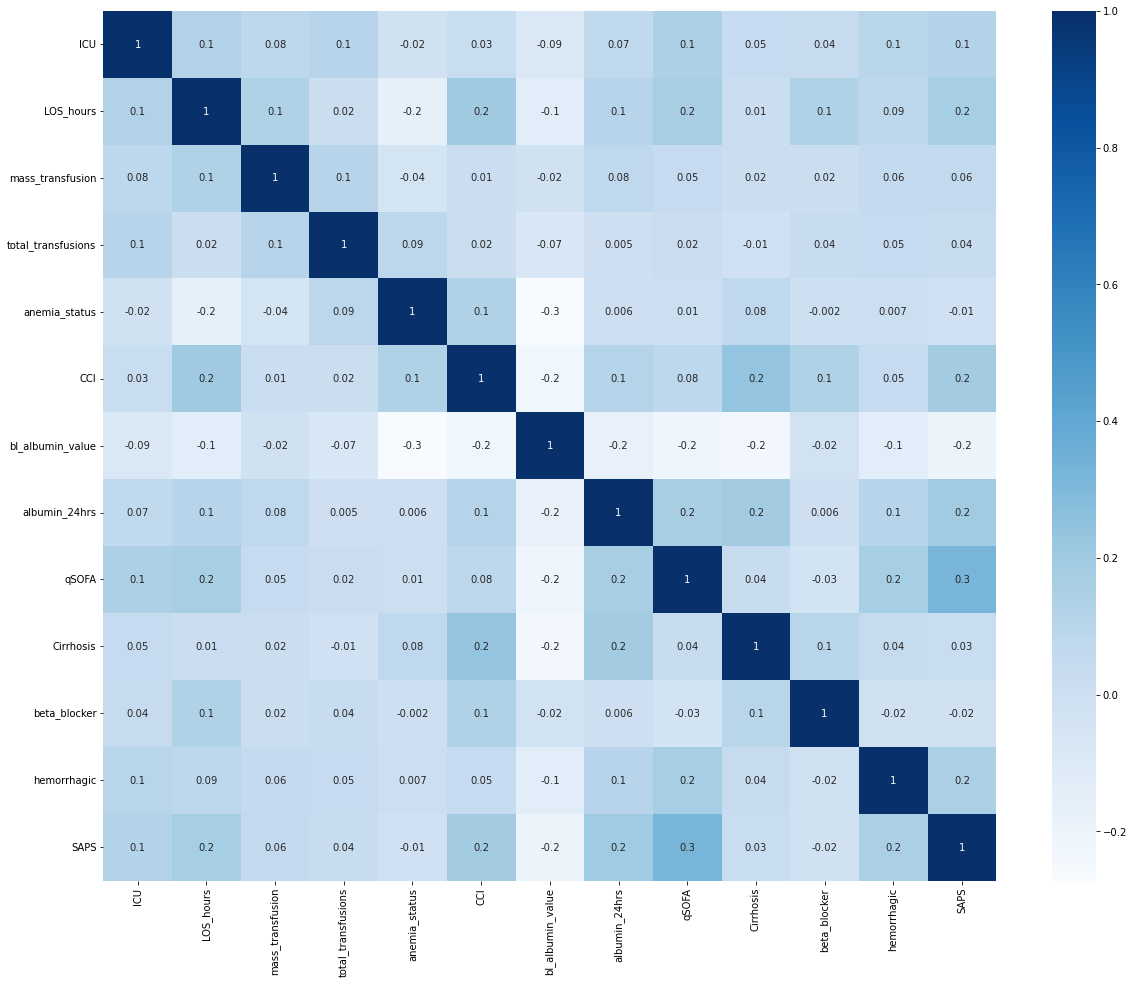

In [87]:
# visualizing correlations with heatmap
plt.figure(figsize=(20,16))
corr = df.corr()
heatmap = sns.heatmap(corr, annot=True, cmap='Blues', fmt='.1g')

In [ ]:
report.correlation_report(df, pdf_file_name='test.pdf')

interval columns not set, guessing: ['ICU', 'LOS_days', '90_day_mortality', '90_day_readmission', 'hospital_free_days', 'Cirrhosis', 'CCI', 'qSOFA', 'MELD', 'albumin_timing', 'SEWS', 'albumin', 'albumin_24hrs']


C:\ProgramData\Anaconda3\lib\site-packages\phik\data_quality.py:62: UserWarning: The number of unique values of variable encounterid is large: 60912. Are you sure this is not an interval variable? Analysis for pairs of variables including encounterid can be slow.
  col, df[col].nunique()
C:\ProgramData\Anaconda3\lib\site-packages\phik\data_quality.py:62: UserWarning: The number of unique values of variable personid is large: 60912. Are you sure this is not an interval variable? Analysis for pairs of variables including personid can be slow.
  col, df[col].nunique()
C:\ProgramData\Anaconda3\lib\site-packages\phik\data_quality.py:74: UserWarning: Not enough unique value for variable 90_day_mortality for analysis 1. Dropping this column
  col, df[col].nunique()
Exception in thread ExecutorManagerThread:
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\threading.py", line 926, in _bootstrap_inner
    self.run()
  File "C:\ProgramData\Anaconda3\lib\site-packages\jobli

In [3]:
from platform import python_version

print(python_version())

3.7.13


## Statistical Significance: P-values

In [89]:
df.head()

ICU    LOS_hours  mass_transfusion  total_transfusions  anemia_status  CCI  \
0    1  1016.016667                 0                   1            2.0    6   
1    1   531.133333                 1                   0            0.0    4   
3    0   388.650000                 0                   0            1.0    3   
4    0   135.266667                 0                   0            3.0    2   
5    1   343.133333                 0                   0            0.0    4   

   bl_albumin_value  albumin_24hrs  qSOFA  Cirrhosis  beta_blocker  \
0               2.9            0.0      1          0             1   
1               3.1            0.0      0          1             0   
3               2.2            0.0      0          1             0   
4               1.5            0.0      0          1             0   
5               3.5            1.0      1          0             1   

   hemorrhagic  SAPS  
0            0    34  
1            0    18  
3            0    29  
4            0    43  
5            0    34

In [90]:
ivs = df.columns.tolist()
print(ivs)

['ICU', 'LOS_hours', 'mass_transfusion', 'total_transfusions', 'anemia_status', 'CCI', 'bl_albumin_value', 'albumin_24hrs', 'qSOFA', 'Cirrhosis', 'beta_blocker', 'hemorrhagic', 'SAPS']


In [91]:
sig_df = []

for iv in ivs:
    r, p = stats.pearsonr(df['LOS_hours'], df[iv])
    lst = [iv, r, p]
    sig_df.append(lst)

sig_df = pd.DataFrame(sig_df, columns=['Var', 'Corr', 'p-value'])

In [92]:
sig_df

Var      Corr        p-value
0                  ICU  0.129312  4.344488e-226
1            LOS_hours  1.000000   0.000000e+00
2     mass_transfusion  0.132374  6.472507e-237
3   total_transfusions  0.016616   3.993828e-05
4        anemia_status -0.157893   0.000000e+00
5                  CCI  0.203078   0.000000e+00
6     bl_albumin_value -0.130242  2.377321e-229
7        albumin_24hrs  0.105726  2.123725e-151
8                qSOFA  0.165639   0.000000e+00
9            Cirrhosis  0.014357   3.863785e-04
10        beta_blocker  0.133844  3.318646e-242
11         hemorrhagic  0.085036   1.895919e-98
12                SAPS  0.174955   0.000000e+00

In [93]:
sig = sig_df.loc[sig_df['p-value'] <= 0.05]
sig

Var      Corr        p-value
0                  ICU  0.129312  4.344488e-226
1            LOS_hours  1.000000   0.000000e+00
2     mass_transfusion  0.132374  6.472507e-237
3   total_transfusions  0.016616   3.993828e-05
4        anemia_status -0.157893   0.000000e+00
5                  CCI  0.203078   0.000000e+00
6     bl_albumin_value -0.130242  2.377321e-229
7        albumin_24hrs  0.105726  2.123725e-151
8                qSOFA  0.165639   0.000000e+00
9            Cirrhosis  0.014357   3.863785e-04
10        beta_blocker  0.133844  3.318646e-242
11         hemorrhagic  0.085036   1.895919e-98
12                SAPS  0.174955   0.000000e+00

In [94]:
ins = sig_df.loc[sig_df['p-value'] > 0.05]
ins

Empty DataFrame
Columns: [Var, Corr, p-value]
Index: []

## 30D Mortality

In [95]:
# drop other dvs: LOS_hours, 30_day_readmission

df = f_df.drop(columns=['LOS_hours', '30_day_readmission'])

In [96]:
df.drop(columns=['personid', 'encounterid'], inplace=True)

In [97]:
df.head()

ICU  mass_transfusion  total_transfusions  anemia_status  CCI  \
0    1                 0                   1            2.0    6   
1    1                 1                   0            0.0    4   
3    0                 0                   0            1.0    3   
4    0                 0                   0            3.0    2   
5    1                 0                   0            0.0    4   

   30_day_mortality  bl_albumin_value  albumin_24hrs  qSOFA  Cirrhosis  \
0                 0               2.9            0.0      1          0   
1                 0               3.1            0.0      0          1   
3                 0               2.2            0.0      0          1   
4                 0               1.5            0.0      0          1   
5                 0               3.5            1.0      1          0   

   beta_blocker  hemorrhagic  SAPS  
0             1            0    34  
1             0            0    18  
3             0            0    29  
4             0            0    43  
5             1            0    34

## Correlations

In [98]:
# look at variable correlations with 30 day mortality
corr_mat = f_df.corr()['30_day_mortality']
sorted_mat = corr_mat.sort_values()
print(sorted_mat)

bl_albumin_value     -0.160399
beta_blocker         -0.034909
anemia_status        -0.032637
30_day_readmission   -0.012978
total_transfusions    0.022708
mass_transfusion      0.063185
LOS_hours             0.065865
Cirrhosis             0.078754
hemorrhagic           0.104488
ICU                   0.117446
albumin_24hrs         0.135395
CCI                   0.145620
qSOFA                 0.161636
SAPS                  0.200943
30_day_mortality      1.000000
Name: 30_day_mortality, dtype: float64


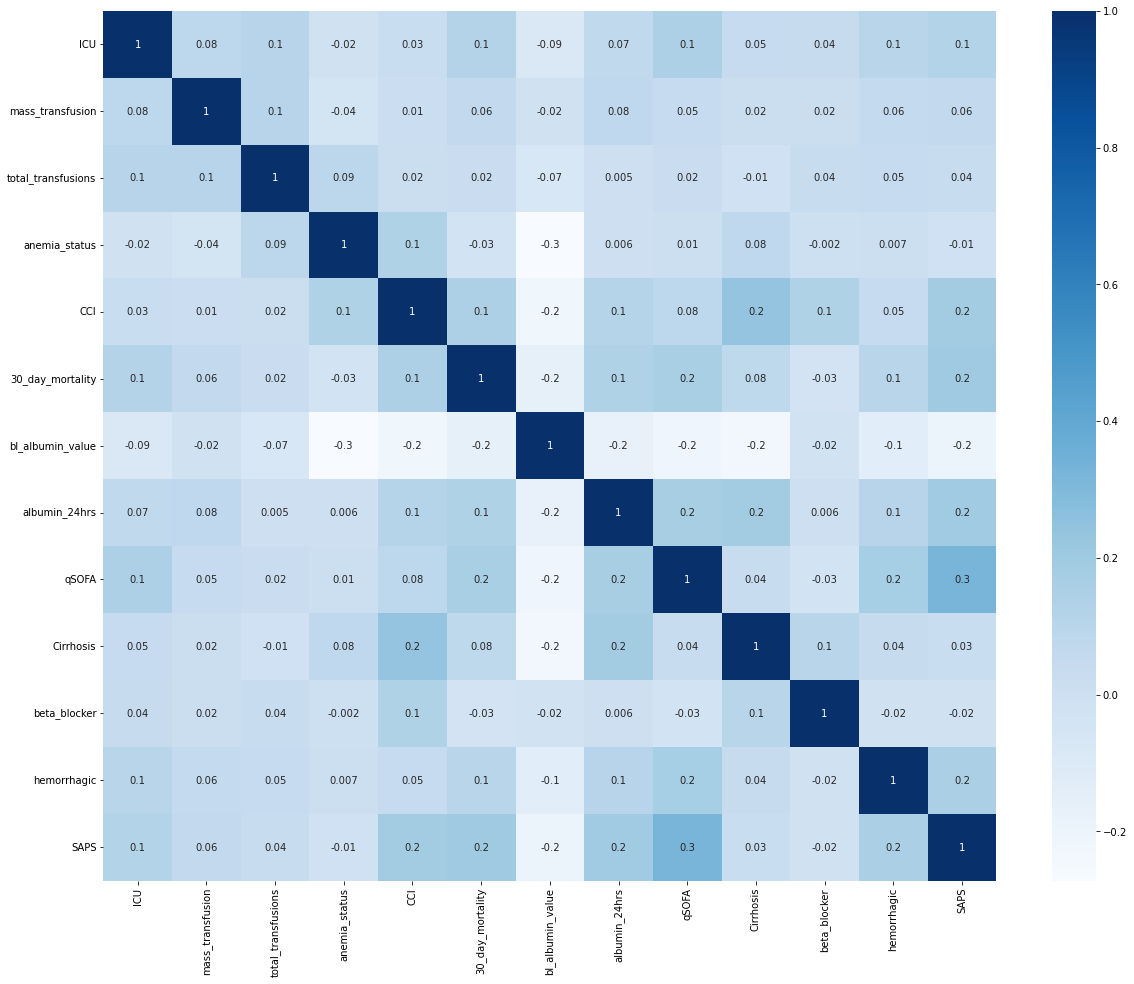

In [99]:
# visualizing correlations with heatmap
plt.figure(figsize=(20,16))
corr = df.corr()
heatmap = sns.heatmap(corr, annot=True, cmap='Blues', fmt='.1g')

## Statistical Significance: P-values

In [100]:
df.head()

ICU  mass_transfusion  total_transfusions  anemia_status  CCI  \
0    1                 0                   1            2.0    6   
1    1                 1                   0            0.0    4   
3    0                 0                   0            1.0    3   
4    0                 0                   0            3.0    2   
5    1                 0                   0            0.0    4   

   30_day_mortality  bl_albumin_value  albumin_24hrs  qSOFA  Cirrhosis  \
0                 0               2.9            0.0      1          0   
1                 0               3.1            0.0      0          1   
3                 0               2.2            0.0      0          1   
4                 0               1.5            0.0      0          1   
5                 0               3.5            1.0      1          0   

   beta_blocker  hemorrhagic  SAPS  
0             1            0    34  
1             0            0    18  
3             0            0    29  
4             0            0    43  
5             1            0    34

In [101]:
ivs = df.columns.tolist()
print(ivs)

['ICU', 'mass_transfusion', 'total_transfusions', 'anemia_status', 'CCI', '30_day_mortality', 'bl_albumin_value', 'albumin_24hrs', 'qSOFA', 'Cirrhosis', 'beta_blocker', 'hemorrhagic', 'SAPS']


In [102]:
sig_df = []

for iv in ivs:
    r, p = stats.pearsonr(df['30_day_mortality'], df[iv])
    lst = [iv, r, p]
    sig_df.append(lst)

sig_df = pd.DataFrame(sig_df, columns=['Var', 'Corr', 'p-value'])

In [103]:
sig_df

Var      Corr        p-value
0                  ICU  0.117446  1.368235e-186
1     mass_transfusion  0.063185   4.213350e-55
2   total_transfusions  0.022708   1.975527e-08
3        anemia_status -0.032637   7.038020e-16
4                  CCI  0.145620  8.792160e-287
5     30_day_mortality  1.000000   0.000000e+00
6     bl_albumin_value -0.160399   0.000000e+00
7        albumin_24hrs  0.135395  7.443359e-248
8                qSOFA  0.161636   0.000000e+00
9            Cirrhosis  0.078754   1.141475e-84
10        beta_blocker -0.034909   6.030221e-18
11         hemorrhagic  0.104488  6.650782e-148
12                SAPS  0.200943   0.000000e+00

In [104]:
sig = sig_df.loc[sig_df['p-value'] <= 0.05]
sig

Var      Corr        p-value
0                  ICU  0.117446  1.368235e-186
1     mass_transfusion  0.063185   4.213350e-55
2   total_transfusions  0.022708   1.975527e-08
3        anemia_status -0.032637   7.038020e-16
4                  CCI  0.145620  8.792160e-287
5     30_day_mortality  1.000000   0.000000e+00
6     bl_albumin_value -0.160399   0.000000e+00
7        albumin_24hrs  0.135395  7.443359e-248
8                qSOFA  0.161636   0.000000e+00
9            Cirrhosis  0.078754   1.141475e-84
10        beta_blocker -0.034909   6.030221e-18
11         hemorrhagic  0.104488  6.650782e-148
12                SAPS  0.200943   0.000000e+00

In [105]:
ins = sig_df.loc[sig_df['p-value'] > 0.05]
ins

Empty DataFrame
Columns: [Var, Corr, p-value]
Index: []

## 30D Readmission

In [106]:
# drop other dvs: LOS_hours, 30_day_mortality

df = f_df.drop(columns=['LOS_hours', '30_day_mortality'])

In [107]:
df.drop(columns=['personid', 'encounterid'], inplace=True)

In [108]:
df.head()

ICU  mass_transfusion  total_transfusions  anemia_status  CCI  \
0    1                 0                   1            2.0    6   
1    1                 1                   0            0.0    4   
3    0                 0                   0            1.0    3   
4    0                 0                   0            3.0    2   
5    1                 0                   0            0.0    4   

   30_day_readmission  bl_albumin_value  albumin_24hrs  qSOFA  Cirrhosis  \
0                   0               2.9            0.0      1          0   
1                   1               3.1            0.0      0          1   
3                   0               2.2            0.0      0          1   
4                   0               1.5            0.0      0          1   
5                   1               3.5            1.0      1          0   

   beta_blocker  hemorrhagic  SAPS  
0             1            0    34  
1             0            0    18  
3             0            0    29  
4             0            0    43  
5             1            0    34

## Correlations

In [109]:
# look at variable correlations with 30 day readmission
corr_mat = df.corr()['30_day_readmission']
sorted_mat = corr_mat.sort_values()
print(sorted_mat)

bl_albumin_value     -0.058411
SAPS                 -0.014255
qSOFA                -0.012501
mass_transfusion     -0.012368
hemorrhagic          -0.006435
ICU                   0.003327
albumin_24hrs         0.015286
beta_blocker          0.032904
Cirrhosis             0.044904
anemia_status         0.058674
total_transfusions    0.071512
CCI                   0.088885
30_day_readmission    1.000000
Name: 30_day_readmission, dtype: float64


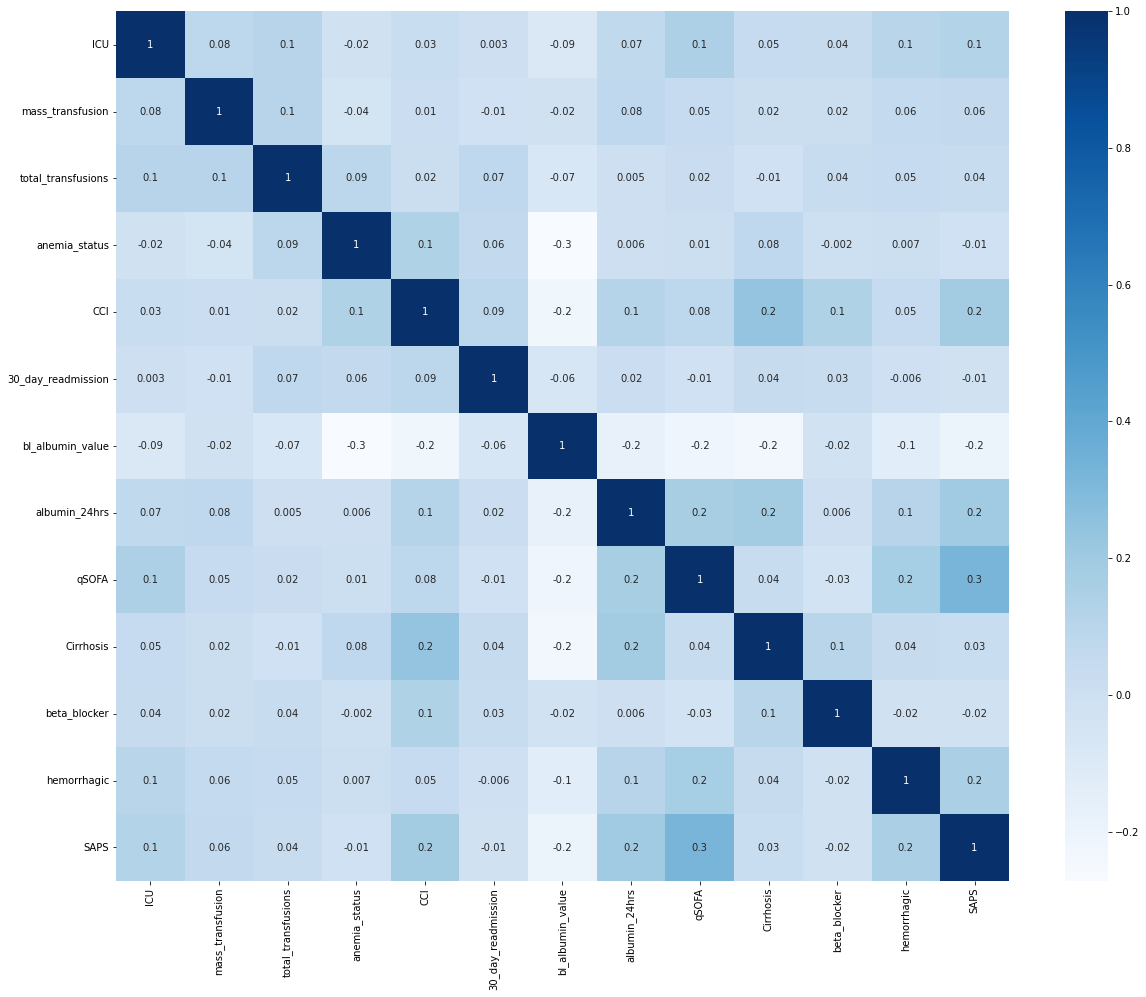

In [110]:
# visualizing correlations with heatmap
plt.figure(figsize=(20,16))
corr = df.corr()
heatmap = sns.heatmap(corr, annot=True, cmap='Blues', fmt='.1g')

## Statistical Significance: P-values

In [111]:
df.head()

ICU  mass_transfusion  total_transfusions  anemia_status  CCI  \
0    1                 0                   1            2.0    6   
1    1                 1                   0            0.0    4   
3    0                 0                   0            1.0    3   
4    0                 0                   0            3.0    2   
5    1                 0                   0            0.0    4   

   30_day_readmission  bl_albumin_value  albumin_24hrs  qSOFA  Cirrhosis  \
0                   0               2.9            0.0      1          0   
1                   1               3.1            0.0      0          1   
3                   0               2.2            0.0      0          1   
4                   0               1.5            0.0      0          1   
5                   1               3.5            1.0      1          0   

   beta_blocker  hemorrhagic  SAPS  
0             1            0    34  
1             0            0    18  
3             0            0    29  
4             0            0    43  
5             1            0    34

In [112]:
ivs = df.columns.tolist()
print(ivs)

['ICU', 'mass_transfusion', 'total_transfusions', 'anemia_status', 'CCI', '30_day_readmission', 'bl_albumin_value', 'albumin_24hrs', 'qSOFA', 'Cirrhosis', 'beta_blocker', 'hemorrhagic', 'SAPS']


In [113]:
sig_df = []

for iv in ivs:
    r, p = stats.pearsonr(df['30_day_readmission'], df[iv])
    lst = [iv, r, p]
    sig_df.append(lst)

sig_df = pd.DataFrame(sig_df, columns=['Var', 'Corr', 'p-value'])

In [114]:
sig_df

Var      Corr        p-value
0                  ICU  0.003327   4.108583e-01
1     mass_transfusion -0.012368   2.231623e-03
2   total_transfusions  0.071512   4.177425e-70
3        anemia_status  0.058674   9.499769e-48
4                  CCI  0.088885  2.032226e-107
5   30_day_readmission  1.000000   0.000000e+00
6     bl_albumin_value -0.058411   2.454163e-47
7        albumin_24hrs  0.015286   1.575546e-04
8                qSOFA -0.012501   1.998565e-03
9            Cirrhosis  0.044904   1.175345e-28
10        beta_blocker  0.032904   4.082810e-16
11         hemorrhagic -0.006435   1.116663e-01
12                SAPS -0.014255   4.251356e-04

In [115]:
sig = sig_df.loc[sig_df['p-value'] <= 0.05]
sig

Var      Corr        p-value
1     mass_transfusion -0.012368   2.231623e-03
2   total_transfusions  0.071512   4.177425e-70
3        anemia_status  0.058674   9.499769e-48
4                  CCI  0.088885  2.032226e-107
5   30_day_readmission  1.000000   0.000000e+00
6     bl_albumin_value -0.058411   2.454163e-47
7        albumin_24hrs  0.015286   1.575546e-04
8                qSOFA -0.012501   1.998565e-03
9            Cirrhosis  0.044904   1.175345e-28
10        beta_blocker  0.032904   4.082810e-16
12                SAPS -0.014255   4.251356e-04

In [116]:
ins = sig_df.loc[sig_df['p-value'] > 0.05]
ins

Var      Corr   p-value
0           ICU  0.003327  0.410858
11  hemorrhagic -0.006435  0.111666

## Check Intercorrelations between indep. vars

## Remove Variables with High Intercorellation

In [117]:
df_iv = f_df.drop(columns= ['LOS_hours', '30_day_mortality', '30_day_readmission'])

In [118]:
df_iv.drop(columns=['personid', 'encounterid'], inplace=True)

In [119]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = df_iv.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df_iv.values, i)
                          for i in range(len(df_iv.columns))]
  
print(vif_data)

               feature       VIF
0                  ICU  1.332805
1     mass_transfusion  1.059182
2   total_transfusions  1.399550
3        anemia_status  3.015042
4                  CCI  3.447043
5     bl_albumin_value  5.566929
6        albumin_24hrs  1.210590
7                qSOFA  1.784483
8            Cirrhosis  1.511816
9         beta_blocker  1.543187
10         hemorrhagic  1.142496
11                SAPS  6.771101


In [120]:
# df_iv.drop(columns=['albumin'], inplace=True)

In [121]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = df_iv.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df_iv.values, i)
                          for i in range(len(df_iv.columns))]
  
print(vif_data)

               feature       VIF
0                  ICU  1.332805
1     mass_transfusion  1.059182
2   total_transfusions  1.399550
3        anemia_status  3.015042
4                  CCI  3.447043
5     bl_albumin_value  5.566929
6        albumin_24hrs  1.210590
7                qSOFA  1.784483
8            Cirrhosis  1.511816
9         beta_blocker  1.543187
10         hemorrhagic  1.142496
11                SAPS  6.771101


In [123]:
# df_iv.drop(columns=['tenant'], inplace=True)

In [124]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = df_iv.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df_iv.values, i)
                          for i in range(len(df_iv.columns))]
  
print(vif_data)

               feature       VIF
0                  ICU  1.332805
1     mass_transfusion  1.059182
2   total_transfusions  1.399550
3        anemia_status  3.015042
4                  CCI  3.447043
5     bl_albumin_value  5.566929
6        albumin_24hrs  1.210590
7                qSOFA  1.784483
8            Cirrhosis  1.511816
9         beta_blocker  1.543187
10         hemorrhagic  1.142496
11                SAPS  6.771101


In [125]:
#df_iv.drop(columns=['SAPS'], inplace=True)

In [126]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = df_iv.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df_iv.values, i)
                          for i in range(len(df_iv.columns))]
  
print(vif_data)

               feature       VIF
0                  ICU  1.332805
1     mass_transfusion  1.059182
2   total_transfusions  1.399550
3        anemia_status  3.015042
4                  CCI  3.447043
5     bl_albumin_value  5.566929
6        albumin_24hrs  1.210590
7                qSOFA  1.784483
8            Cirrhosis  1.511816
9         beta_blocker  1.543187
10         hemorrhagic  1.142496
11                SAPS  6.771101


In [127]:
print(vif_data['feature'].to_list())

['ICU', 'mass_transfusion', 'total_transfusions', 'anemia_status', 'CCI', 'bl_albumin_value', 'albumin_24hrs', 'qSOFA', 'Cirrhosis', 'beta_blocker', 'hemorrhagic', 'SAPS']


In [129]:
df.columns

Index(['ICU', 'mass_transfusion', 'total_transfusions', 'anemia_status', 'CCI',
       '30_day_readmission', 'bl_albumin_value', 'albumin_24hrs', 'qSOFA',
       'Cirrhosis', 'beta_blocker', 'hemorrhagic', 'SAPS'],
      dtype='object')

In [130]:
# 16 independent features
f_df = f_df[['personid', 'encounterid', 'ICU', 'mass_transfusion', 'total_transfusions', \
             'anemia_status', 'CCI', 'bl_albumin_value', \
             'albumin_24hrs', 'qSOFA', 'Cirrhosis', \
             'beta_blocker', 'hemorrhagic', 'LOS_hours', '30_day_mortality', \
             '30_day_readmission', 'SAPS']]

## Convert Numeric Outcome Variables to Categorical

## Export as csv for other analysis

In [131]:
f_df.to_csv('C:/Users/Iweimer/Desktop/BB_Git/1083-albumin-data-exploration/ML/GI_Bleed_Tables/albumin_cleaned_for_psm1.csv', index=False)

In [ ]:
## update: will convert to categorical after matching

## Convert LOS_Hours and ICU_LOS_hours Vars to Days Vars

In [360]:
f_df['LOS_days'] = f_df['LOS_hours']/24
f_df.drop(columns=['LOS_hours'], inplace=True)

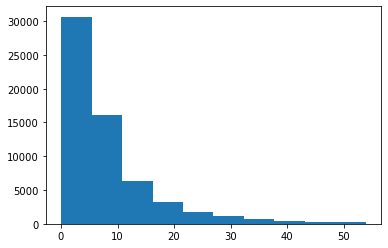

In [361]:
plt.hist(f_df['LOS_days']);

In [362]:
f_df['LOS_days'].describe()

count    61109.000000
mean         8.458117
std          8.253185
min          0.050000
25%          3.250694
50%          5.402778
75%         10.197917
max         53.870833
Name: LOS_days, dtype: float64

## Convert LOS_days to Categorical

In [363]:
# Calculate Tertiles

q1 = f_df['LOS_days'].quantile(q=(1/3))
q2 = f_df['LOS_days'].quantile(q=(2/3))
print(q1)
print(q2)

3.9493364197530854
8.041435185185177


In [364]:
# bin the LOS_days var

LOS = f_df['LOS_days']
m = max(LOS)

bins = [0, 3.9493364197530854, 8.041435185185177, m]
labels=[0, 1, 2]

# 0 - Low/Short Length of Stay
# 1 - Medium Length of Stay
# 2 - High/Long Length of Stay

f_df['LOS_days'] = pd.cut(LOS, bins=bins, labels=labels, include_lowest=True)

In [365]:
f_df['LOS_days'].value_counts()

0    20370
2    20370
1    20369
Name: LOS_days, dtype: int64